<a href="https://colab.research.google.com/github/404DataScientist/California-Housing/blob/main/California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target
display(housing_df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


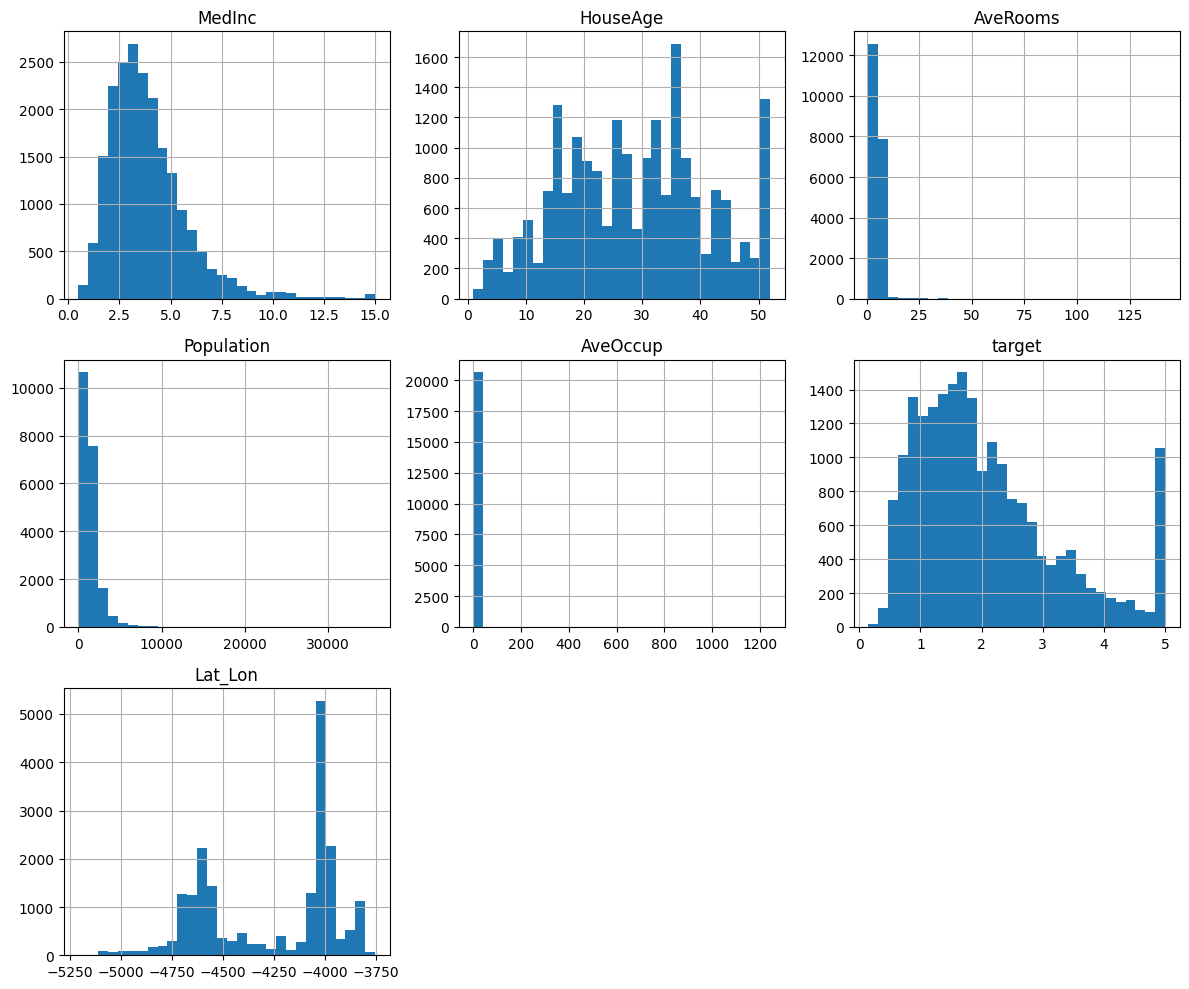

In [16]:
housing_df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

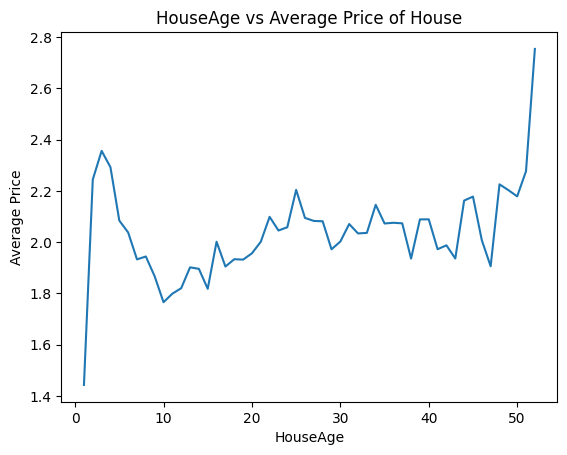

In [22]:
housing_df.groupby('HouseAge')['target'].mean().plot()
plt.ylabel('Average Price')
plt.title('HouseAge vs Average Price of House')
plt.show()

In [5]:
housing_df['Lat_Lon'] = housing_df['Latitude'] * housing_df['Longitude']
housing_df = housing_df.drop(['AveBedrms', 'Latitude', 'Longitude'], axis=1)
display(housing_df.head())

,MedInc,HouseAge,AveRooms,Population,AveOccup,target,Lat_Lon
0,8.3252,41.0,6.984127,322.0,2.555556,4.526,-4630.0724
1,8.3014,21.0,6.238137,2401.0,2.109842,3.585,-4627.2492
2,7.2574,52.0,8.288136,496.0,2.802260,3.521,-4626.7840
3,5.6431,52.0,5.817352,558.0,2.547945,3.413,-4627.1625
4,3.8462,52.0,6.281853,565.0,2.181467,3.422,-4627.1625


In [6]:
from sklearn.model_selection import train_test_split

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 6)
Shape of X_test: (4128, 6)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


In [7]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63, 127]
}
print(param_grid)

{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'num_leaves': [31, 63, 127]}


In [8]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

lgbm = LGBMRegressor(random_state=42)

grid_search = GridSearchCV(lgbm, param_grid, cv=5)

In [9]:
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 13209, number of used features: 6
[LightGBM] [Info] Start training from score 2.067432
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 13209, number of used features: 6
[LightGBM] [Info] Start training from score 2.070997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 13210, number of used features: 6
[LightGBM] [Info] Start traini

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 63, 127]})

In [10]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score (mean cross-validated R2):", best_score)

Best Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 300, 'num_leaves': 63}
Best Score (mean cross-validated R2): 0.7629079721369818


In [11]:
from sklearn.metrics import r2_score

y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on the test set:", r2)

R-squared score on the test set: 0.7631342469774748


In [14]:
import joblib

# Save the trained model
joblib.dump(grid_search.best_estimator_, 'california_lgbm_model.pkl')

print("Model saved successfully as 'california_lgbm_model.pkl'")

Model saved successfully as 'california_lgbm_model.pkl'
